**Importing Important Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from scipy.io import loadmat

**Data Preprocessing**

In [2]:
def preprocess_data(X_train, X_test):
    X_train = np.moveaxis(X_train, -1, 0)
    X_test = np.moveaxis(X_test, -1, 0)
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
    return X_train, X_test

**Loading Data**

In [3]:
def load_svhn_data(path):
    data = loadmat(path)
    return data['X'], data['y']

**Augmenting The Data**

In [4]:
def augment_data(X_train):
    datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(X_train)
    return datagen

**Defining The Model**

In [5]:
def build_model(input_shape):
    model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        Flatten(),
        Dense(units=128, activation='relu'),
        Dense(units=10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

**Training The Model**

In [6]:
def train_model(model, datagen, X_train, y_train, X_val, y_val, batch_size, epochs):
    history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                        validation_data=(X_val, y_val),
                        epochs=epochs)
    return history

*Calling To Load Data*

In [7]:
X_train, y_train=load_svhn_data("F:/train_32x32.mat")
X_test, y_test =load_svhn_data("F:/test_32x32.mat")

*Data Shape*

In [8]:
X_train.shape

(32, 32, 3, 73257)

*Data preprocessing*

In [9]:
X_train, X_test = preprocess_data(X_train, X_test)
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


*Data Shape after preprocessing*

In [10]:
X_train.shape

(73257, 32, 32, 3)

*Visualizing the first image*

labeled as [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


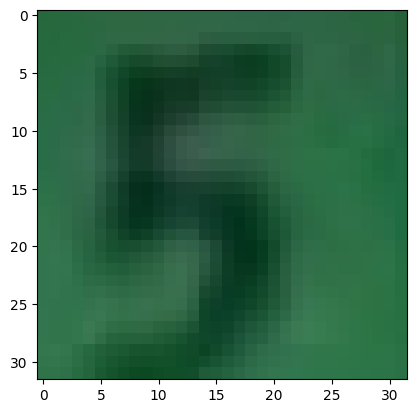

In [11]:
import matplotlib.pyplot as plt
print("labeled as %s"% y_test[0])
plt.imshow(X_test[0])
plt.show()


*Calling Data Augmentation*

In [12]:
datagen = augment_data(X_train)

*Building CNN Model*

In [13]:
model = build_model(X_train.shape[1:])

c:\Users\zanam\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*Model Summary*

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353,034 (1.35 MB)

 Trainable params: 352,842 (1.35 MB)

 Non-trainable params: 192 (768.00 B)

*Calling To Training The CNN Model*

In [15]:
history = train_model(model, datagen, X_train, y_train, X_test, y_test, batch_size=64, epochs=10)

Epoch 1/10


c:\Users\zanam\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 530s 448ms/step - accuracy: 0.4036 - loss: 1.7316 - val_accuracy: 0.7607 - val_loss: 0.7751
Epoch 2/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 560s 489ms/step - accuracy: 0.7120 - loss: 0.8974 - val_accuracy: 0.8404 - val_loss: 0.5383
Epoch 3/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 553s 483ms/step - accuracy: 0.7746 - loss: 0.7089 - val_accuracy: 0.8597 - val_loss: 0.4658
Epoch 4/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 551s 481ms/step - accuracy: 0.8021 - loss: 0.6292 - val_accuracy: 0.8585 - val_loss: 0.4558
Epoch 5/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 537s 469ms/step - accuracy: 0.8142 - loss: 0.5855 - val_accuracy: 0.8891 - val_loss: 0.3806
Epoch 6/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 553s 482ms/step - accuracy: 0.8284 - loss: 0.5564 - val_accuracy: 0.8798 - val_loss: 0.3994
Epoch 7/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 551s 480ms/step - accuracy: 0.8369 - loss: 0.5238 - val_accuracy: 0.8922 - val_loss: 0.3714
Epoch 8/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 551s 481ms/step - accuracy: 0.8

*Evaluvating the CNN model*

In [16]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
report = classification_report(y_true_classes, y_pred_classes)
print(report)


814/814 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1744
           1       0.93      0.94      0.94      5099
           2       0.95      0.91      0.93      4149
           3       0.86      0.87      0.87      2882
           4       0.91      0.94      0.93      2523
           5       0.89      0.91      0.90      2384
           6       0.82      0.88      0.85      1977
           7       0.97      0.85      0.90      2019
           8       0.88      0.84      0.86      1660
           9       0.87      0.89      0.88      1595

    accuracy                           0.90     26032
   macro avg       0.90      0.90      0.90     26032
weighted avg       0.90      0.90      0.90     26032



*Confusion Matrix*

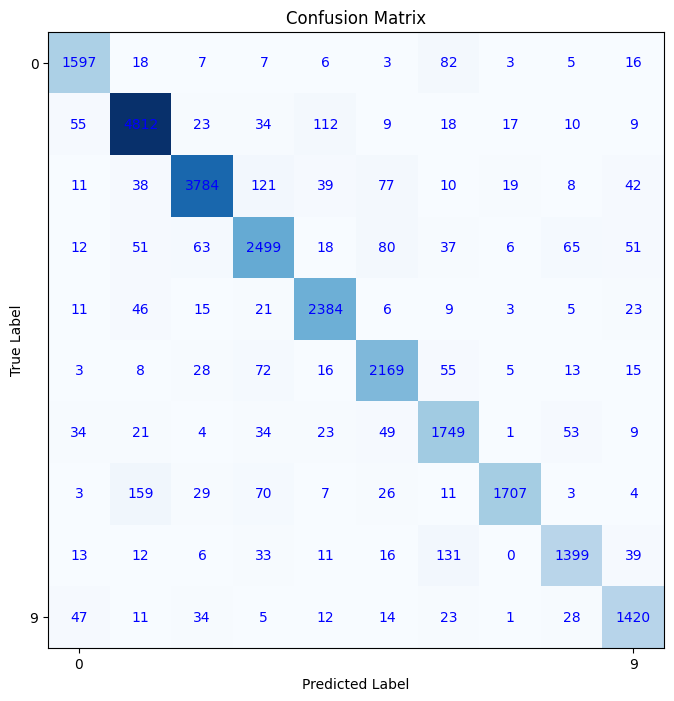

In [17]:
conf_matrix=confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix,cmap='Blues',interpolation='nearest')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0,9],['0','9'])
plt.yticks([0,9],['0','9'])
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j,i,conf_matrix[i,j],ha='center',va="center",color="b")
plt.show()

*Accuracy  
Precision  
Recall  
F1-Score*

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9035
Precision: 0.9048
Recall: 0.9035
F1-Score: 0.9036


*Ploting Training & Validating Accuracy*

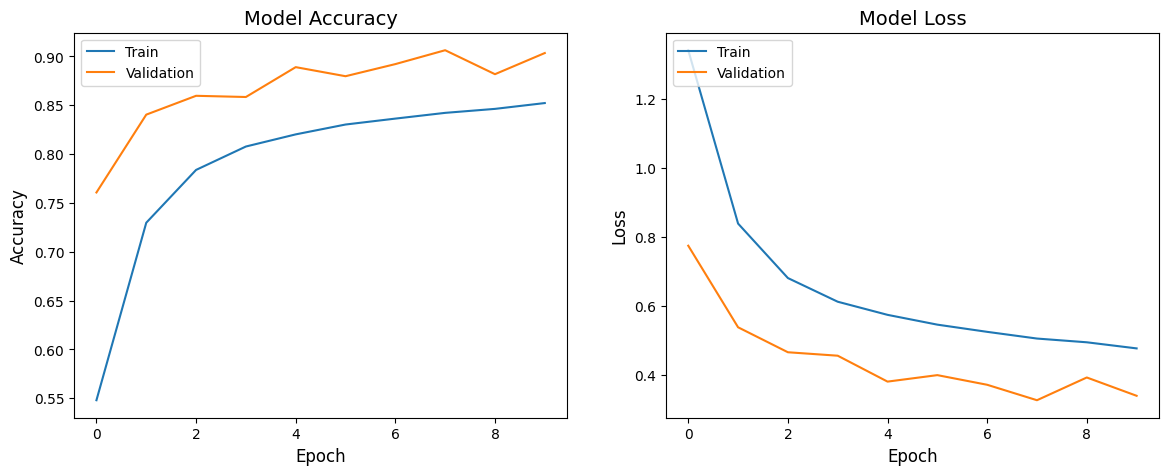

In [24]:
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

*Image == Labeled Value == Predicted Value*

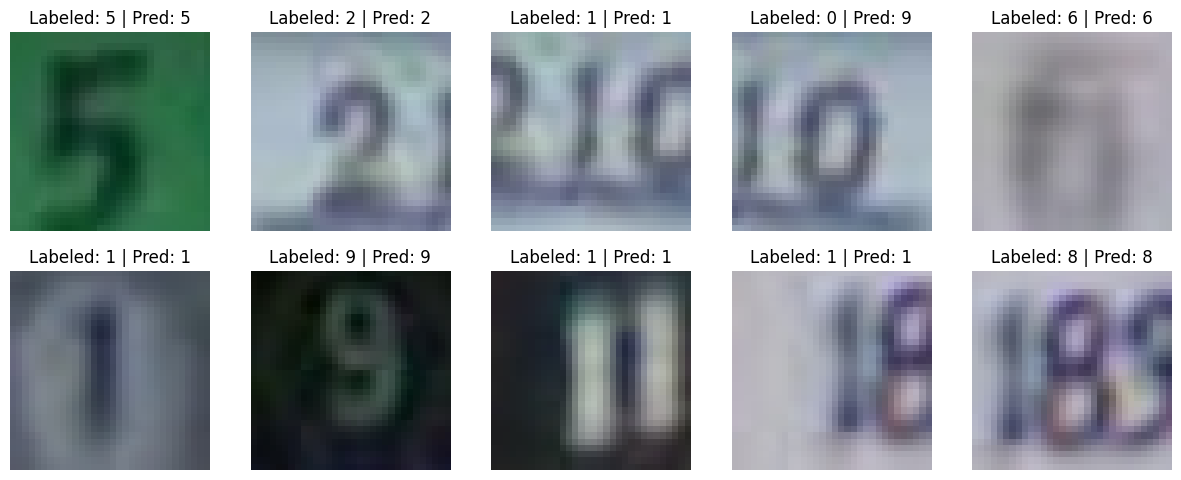

In [25]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test, axis=1)
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Labeled: {true_classes[i]} | Pred: {predicted_classes[i]}")
    plt.axis('off')
plt.show()